# DRILL - Exploring the Central Limit Theorem

Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.

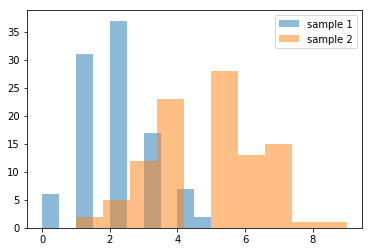

1.94
4.8
1.0846197490365
1.5556349186104044


In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

sample1_100 = np.random.choice(pop1, 100, replace=True)
sample2_100 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1_100, alpha=0.5, label='sample 1')
plt.hist(sample2_100, alpha=0.5, label='sample 2')
plt.legend(loc='upper right')
plt.show()

print(sample1_100.mean())
print(sample2_100.mean())
print(sample1_100.std())
print(sample2_100.std())

__Q1.__ Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

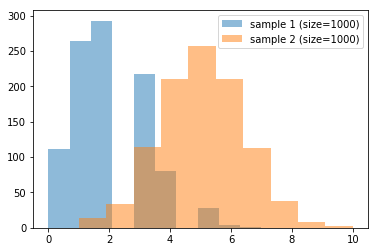

1.996
4.996
1.2601523717392273
1.5420713342773738


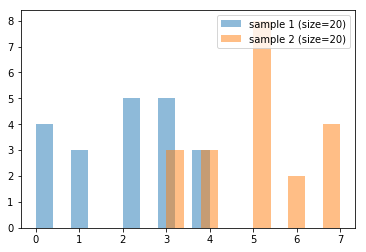

2.0
5.05
1.3416407864998738
1.2835497652993437


In [2]:
sample1_1000 = np.random.choice(pop1, 1000, replace=True)
sample2_1000 = np.random.choice(pop2, 1000, replace=True)

plt.hist(sample1_1000, alpha=0.5, label='sample 1 (size=1000)')
plt.hist(sample2_1000, alpha=0.5, label='sample 2 (size=1000)')
plt.legend(loc='upper right')
plt.show()

print(sample1_1000.mean())
print(sample2_1000.mean())
print(sample1_1000.std())
print(sample2_1000.std())

sample1_20 = np.random.choice(pop1, 20, replace=True)
sample2_20 = np.random.choice(pop2, 20, replace=True)

plt.hist(sample1_20, alpha=0.5, label='sample 1 (size=20)')
plt.hist(sample2_20, alpha=0.5, label='sample 2 (size=20)')
plt.legend(loc='upper right')
plt.show()

print(sample1_20.mean())
print(sample2_20.mean())
print(sample1_20.std())
print(sample2_20.std())

__Q2.__ Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

In [3]:
pop3 = np.random.binomial(10, 0.3, 10000)

sample3 = np.random.choice(pop3, 100, replace=True)

from scipy.stats import ttest_ind
print(ttest_ind(sample3, sample2_100, equal_var=False))

Ttest_indResult(statistic=-7.966009631829102, pvalue=1.2793603601961334e-13)


In [4]:
pop4 = np.random.binomial(10, 0.4, 10000)

sample4 = np.random.choice(pop4, 100, replace=True)

print(ttest_ind(sample4, sample2_100, equal_var=False))

Ttest_indResult(statistic=-2.3972367111934267, pvalue=0.01746583606217611)


As the two populations are getting more similar, the t-statistic shrinks, and the p-value becomes larger.


__Q3.__ Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

In [5]:
pop5 = np.random.poisson(0.8, 10000)
pop6 = np.random.poisson(0.5, 10000)
print(pop5.mean())
print(pop6.mean())

sample5 = np.random.choice(pop5, 100, replace=True)
sample6 = np.random.choice(pop6, 100, replace=True)
print(sample5.mean())
print(sample6.mean())

sample7 = np.random.choice(pop5, 1000, replace=True)
sample8 = np.random.choice(pop6, 1000, replace=True)
print(sample7.mean())
print(sample8.mean())

0.7826
0.4899
0.82
0.54
0.772
0.463


Yes. Even though the type of distribution is changed, the sample mean values are still very similar to those of population values, and the larger the sample size, the closer the mean value is to the population mean. This is in line with the Central Limit Theorem.